<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/Image_processing_naip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('gdalutils')
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘gdalutils’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this packag

# New Section

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(zip)

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE

Loading required package: sp


Attaching package: ‘zip’


The following objects are masked from ‘package:utils’:

    unzip, zip




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=a00b5cf8f17ce35f5e072e19d896dad0&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYa2pRRnBnaEdkazhXS0ZGS0oxNWtBNXZqUGYtUzcyTVQwMG9CTXhXN2xxczU3RTRiMmVVQV9Qc19CSHlUMHFidyIsInN0YXRlIjoiYTAwYjVjZjhmMTdjZTM1ZjVlMDcyZTE5ZDg5NmRhZDAifQ==


In [4]:
dir.create('/content/Haleiwa2017/')

In [5]:
# kahuku
# CCAP:  https://drive.google.com/file/d/1JLgaRWIYE3sv9YjRxGyANhDN1EGRdVJ1/view?usp=drive_link
drive_download(file = as_id('1JLgaRWIYE3sv9YjRxGyANhDN1EGRdVJ1'), path =  '/content/Haleiwa2017/Haleiwa_ccap.tif', overwrite = TRUE)

File downloaded:

• haleiwa.tif <id: 1JLgaRWIYE3sv9YjRxGyANhDN1EGRdVJ1>

Saved locally as:

• /content/Haleiwa2017/Haleiwa_ccap.tif



In [6]:
# NAIP

#  https://drive.google.com/file/d/1f4LCIntuumDLTHpk0f9BykzNDHpzJ32U/view?usp=drive_link
drive_download(file = as_id('1f4LCIntuumDLTHpk0f9BykzNDHpzJ32U'), path =  '/content/Haleiwa2017/01.tif', overwrite = TRUE)


File downloaded:

• 2017_haleiwa.tif <id: 1f4LCIntuumDLTHpk0f9BykzNDHpzJ32U>

Saved locally as:

• /content/Haleiwa2017/01.tif



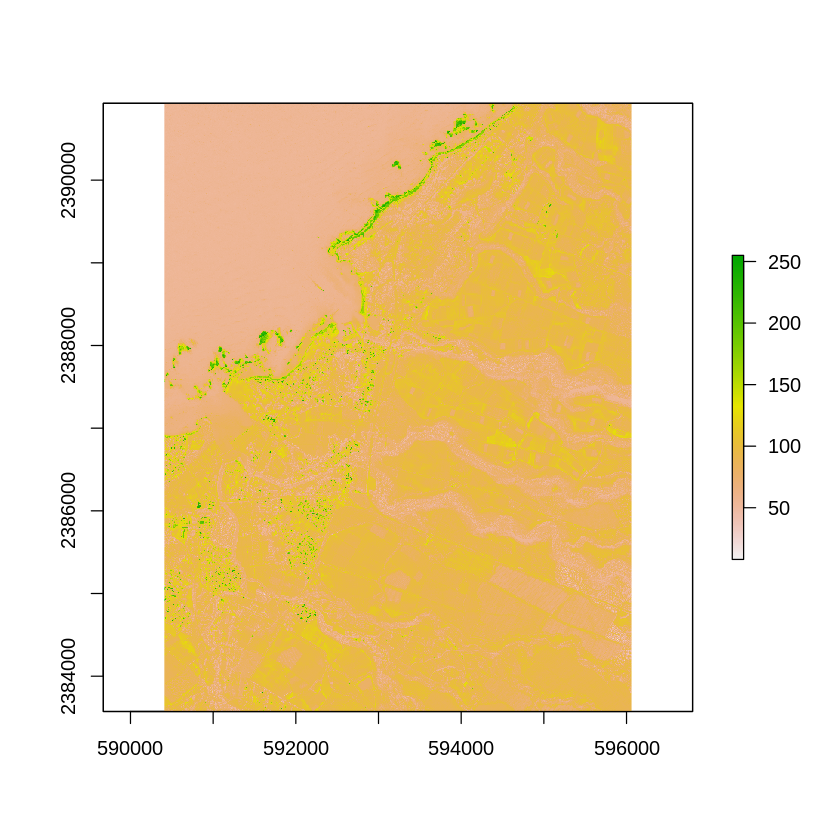

In [9]:
naip <- stack ('/content/Haleiwa2017/01.tif')
naip [[1]]%>% plot

redo the ones where I forgot to include 03

In [ ]:
# planet_raster <-stack(
#   '/content/kahuku2022/01.tif',
# '/content/kahuku2022/02.tif',
# '/content/kahuku2022/03.tif',
# '/content/kahuku2022/04.tif',
# '/content/kahuku2022/05.tif',
# '/content/kahuku2022/06.tif',
# '/content/kahuku2022/07.tif')

In [8]:
ccap_raster <- stack('/content/Haleiwa2017/Haleiwa_ccap.tif')

In [13]:
naip_raster_extended <- extend(naip, projectExtent(ccap_raster, naip), value=NA)

In [14]:
ccap_raster
naip

class      : RasterStack 
dimensions : 3065, 2353, 7211945, 1  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 590411.6, 596058.8, 2383572, 2390928  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : Layer_1 


class      : RasterStack 
dimensions : 18390, 14128, 259813920, 3  (nrow, ncol, ncell, nlayers)
resolution : 0.4, 0.4  (x, y)
extent     : 590409.6, 596060.8, 2383573, 2390929  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
names      : X01_1, X01_2, X01_3 


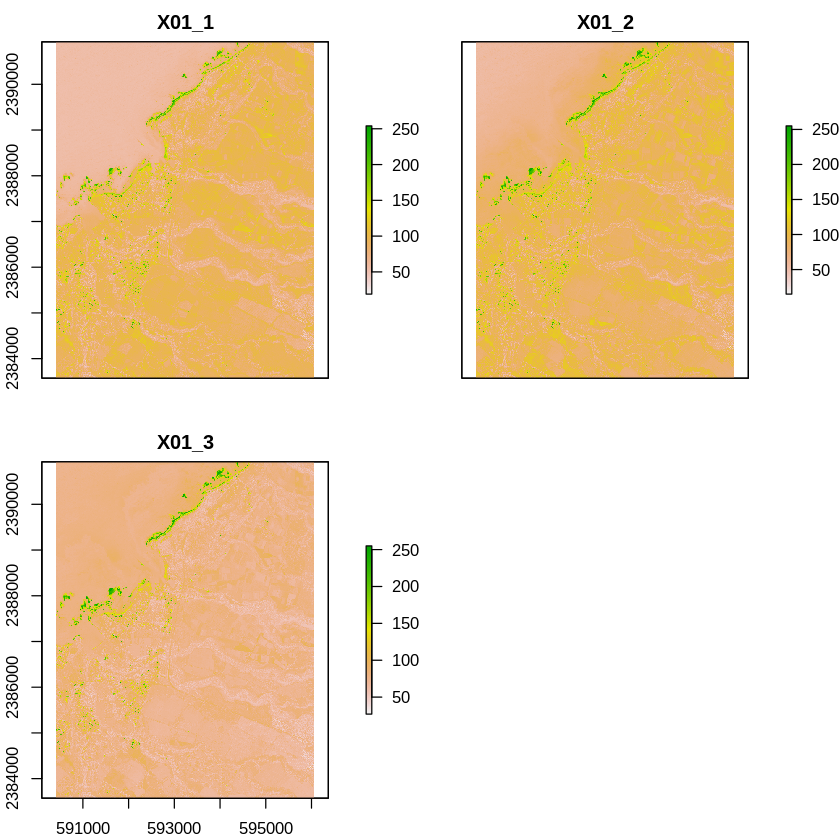

In [11]:
naip %>% plot
# planet_raster %>% plot

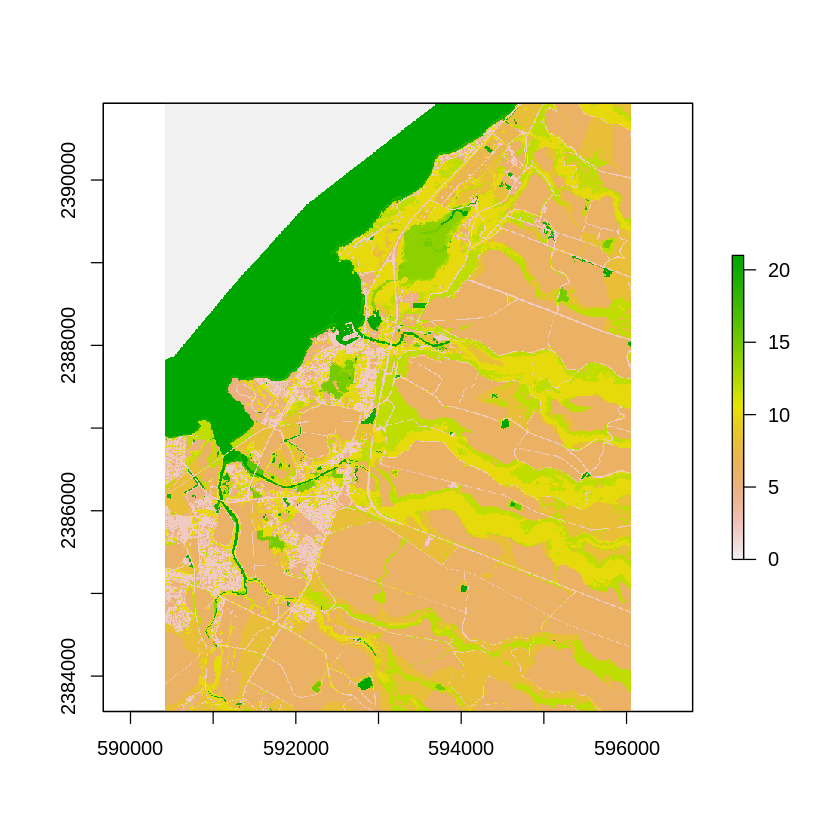

In [12]:
ccap_raster %>% plot

In [15]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

[1] 2353

[1] 3065

In [16]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/Haleiwa2017/Images"
new_folder_path2 <- "/content/Haleiwa2017/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

Folder created: /content/Haleiwa2017/Images 
Folder created: /content/Haleiwa2017/Labels 


In [17]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(naip_raster_extended, projectExtent(ccap_cropped_raster,naip))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/Haleiwa2017/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/Haleiwa2017/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/Haleiwa2017/Haleiwa2017.csv")


class      : RasterBrick 
dimensions : 512, 512, 262144, 3  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 590411.6, 591640.4, 2389699, 2390928  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :    X01_1,    X01_2,    X01_3 
min values : 49.78348, 49.82911, 70.29739 
max values : 101.5246, 104.5246, 115.1520 

class      : RasterBrick 
dimensions : 512, 512, 262144, 3  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 591640.4, 592869.2, 2389697, 2390926  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :    X01_1,    X01_2,    X01_3 
min values : 50.19126, 51.82510, 68.30217 
max values : 107.1943, 128.5667, 122.1214 

class      : RasterBrick 
dimensions : 512, 512, 262144, 3  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 592871.6, 594100.4, 2389699, 2390928  (xmin, xmax, y

In [18]:
zip(zipfile = "/content/Haleiwa2017.zip",
    files = c("/content/Haleiwa2017/Images",
              "/content/Haleiwa2017/Labels",
              "/content/Haleiwa2017/Haleiwa2017.csv"))

In [19]:
# save to processed_data https://drive.google.com/drive/folders/1LNPpbEw86VQ-UV545ihcNuvYMvb7H61X?usp=drive_link
drive_upload(media = "/content/Haleiwa2017.zip", path = as_id("1LNPpbEw86VQ-UV545ihcNuvYMvb7H61X"))

Local file:

• /content/Haleiwa2017.zip

Uploaded into Drive file:

• Haleiwa2017.zip <id: 1eQwaJylMduMLQ1WYfxjhkWmsKAi9igcx>

With MIME type:

• application/zip

